Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# HW 3:  Root Finding and Optimization

## Question 1 - Finding the Root

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  One way to do this is to solve for the zeros of the function $f(x) = x^2 - M$.

 - Note that not all the methods will work!
 - Make sure to handle the case where $M_0 = \sqrt{M}$.
 - We are only looking for the positive root of $f(x)$.

**(a)** [5] Write a function that uses fixed-point iteration to solve for the zeros of $f(x)$.  

Note: There are multiple ways to write the iteration function $g(x)$, some work better than others.  Make sure to use the input function $f(x)$ to formulate this.

In [2]:
#NOTE: changed output from M to x to keep variables consistent with rest of docstring
def fixed_point(x_0, f, tolerance):
    """Find the zeros of the given function f using fixed-point iteration
    
    :Input:
     - *x_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *x* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *x* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # YOUR CODE HERE
    n = 0
    x = x_0 
    g = lambda x: 1 + x - x*x / M
    for i in range(0, MAX_STEPS + 1): 
        residual = numpy.abs(f(x))
        x = g(x)
        if residual < tolerance:
            n -= 1
            break

    return x, n

In [3]:
M = 1.8
TOLERANCE = 1e-10
f = lambda x: x**2 - M

# Note that this test probably will fail
try:
    M_f, n = fixed_point(2.0, f, TOLERANCE)
except OverflowError:
    print("Fixed-point test failed!")
    print("Success!")
else:
    if n == -1:
        print("Fixed-point test failed!")
        print("Success!")
    else:
        print(M_f, n)
        raise ValueError("Test should have failed!")

Fixed-point test failed!
Success!


In [4]:
M = 1.8
TOLERANCE = 1e-10
f = lambda x: x**2 - M

# Note that this test probably will fail
try:
    M_f, n = fixed_point(2.0, f, TOLERANCE)
except OverflowError:
    print("Fixed-point test failed!")
    print("Success!")
else:
    if n == -1:
        print("Fixed-point test failed!")
        print("Success!")
    else:
        print(M_f, n)
        raise ValueError("Test should have failed!")

Fixed-point test failed!
Success!


**(b)** [5] Write a function that uses Newton's method to find the roots of $f(x)$. The analytical derivative of $f'(x)$ is provided.

In [5]:
#NOTE: changed the input from x_0 to M_0, and the output from x to M based on the docstring and the equation

def newton(M_0, f, f_prime, tolerance):
    """Find the zeros of the given function f using Newton's method
    
    :Input:
     - *M_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *f_prime* (function) - The derivative of *f*
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # YOUR CODE HERE
    n = 0
    M = M_0
    M_array = [ M_0 ]
    for k in range(0, MAX_STEPS + 1):
        M = M - f(M) / f_prime(M)
        M_array.append(M)
        n += 1
        if numpy.abs(f(M)) < tolerance:
            n -= 1
            break
    
    if k == MAX_STEPS:
        warnings.warn("Max number of steps exceeded")
                
    return M, n

In [6]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M
f_prime = lambda x: 2.0 * x

M_f, n = newton(2.0, f, f_prime, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print(M_f, n)

M_f, n = newton(numpy.sqrt(M), f, f_prime, TOLERANCE)
print(M_f, n)
assert(n == 0)

print("Success!")

1.7320508075688772 3
1.7320508075688774 0
Success!


**(c)** [5] Write a function to find the zeros of $f(x)$ using the secant method.

In [7]:
#NOTE: changed the input from x_0 to M_0, and the output from x to M based on the docstring and the equation

def secant(M_0, f, tolerance):
    """Find the zeros of the given function f using the secant method
    
    :Input:
     - *M_0* (float) - Initial bracket
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # YOUR CODE HERE
    n = 0
    M0 = M_0[0]
    M1 = M_0[1]

    if numpy.isclose(M0, M1):
        raise ValueError("Initial points are too close")
        
    M_array = M_0
    for k in range(0, MAX_STEPS + 1):
        M = M1 - f(M1) * (M1 - M0) / (f(M1) - f(M0))
        M_array.append(M)
        n += 1
        if numpy.abs(f(M)) < tolerance:
            n -= 1
            break
        M0 = M1
        M1 = M
        
    if k == MAX_STEPS:
        warnings.warn("Maximum number of steps exceeded")
    
    return M, n

In [8]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M

M_f, n = secant([0.0, 3.0], f, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print(M_f, n)

M_f, n = secant([1.0, numpy.sqrt(M)], f, TOLERANCE)
assert(n == 0)

print("Success!")

1.732050807565499 6
Success!


**(d)** [5] Using the theory and illustrative plots why the fixed-point method did not work (pick a bracket that demonstrates the problem well).  

YOUR ANSWER HERE

The theorem states that if there exists a constant $K$ such that $|g'(x*)|≤ K < 1$, then $|e_{k+1}| = K|e_k|$, which suggests convergence. In other words, as $|g'(x*)|$ approaches 1, it converges much more slowly. 

For the g(x) used: 
\begin{equation}
\begin{split}
    g(x) &= 1 + x - x^2/M \\
    g'(x) &= 1 - 2 x / M \\
    g'(x*) &= 1 - 2(sqrt(1.8)) / 1.8 = -0.49 
\end{split}
\end{equation}

Alternatively, 

\begin{equation}
\begin{split}
    g(x) &= M / x \\
    g'(x) &= - M / x^2 = - 1.8 / (\sqrt{1.8})^2 \\
    g'(x*) &= -1 \\
\end{split}
\end{equation}

This would work much worse than the one actually used, since $g'(x*)$ approaches 1 as &x& approaches a point $c$, which means that it is possible for the error $e_k$ to not approach 0 as $k$ increases, in which case fixed-point iteration would not converge. 

## Question 2 - Bessel Function Zeros

The zeros of the Bessel functions $J_0(x)$ can be important for a number of applications.  Considering only $x \geq 0$ 
we are going to find the first ten zeros of $J_0(x)$ by using a hybrid approach.

**(a)** [5] Plot the Bessel function $J_0(x)$ and its zeros on the same plot.  Note that the module `scipy.special` contains functions dealing with the Bessel functions (`jn`).

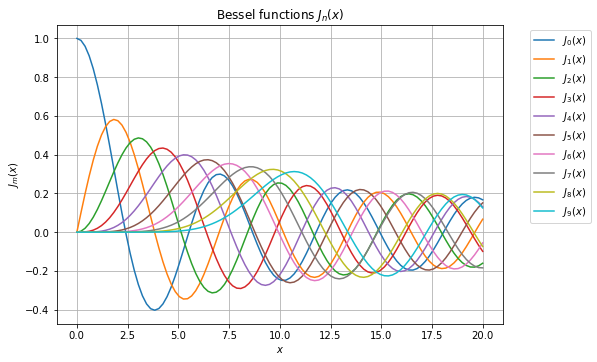

In [9]:
# YOUR CODE HERE
import scipy.special
plt.rcParams["figure.figsize"] = (8,5.5)

x = numpy.linspace(0, 20, 100) 
for n in range(10):
    y = scipy.special.jn(n, x)
    plt.plot(x, y, label = r'$J_ %s (x)$'%n)
plt.grid()
plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.xlabel('$x$')
plt.ylabel('$J_m (x)$')
plt.title(r'Bessel functions $J_n(x)$')
plt.show()

**(b)** [15] Now write a function `j0_zeros` that takes two tolerances, a bracket size tolerance `bracket_tolerance` and `tolerance` for the final convergence tolerance.  Given an initial bracket, the function should perform secant iterations until the bracket size is less than `bracket_tolerance`.  If this is successful then proceed with Newton's method using the newest value of the bracket until `tolerance` is reached.  Return both the zero found and the number of steps needed in each iteration.  Also write a `doc-string` for the function.

Notes:
 - Newton's method by itself does not work here given the initial brackets provided.
 - The secant method does work however it is slower than the approach outlined.
 - Try playing a bit yourself with the tolerances used.

In [10]:
import scipy.special

# Note that the num_steps being returned should be a list 
# of the number of steps being used in each method
def j0_zeros(x0, bracket_tolerance, tolerance):
    """Find the zeros of the Bessel function f using the secant 
    method and the Newton method
    
    :Input:
     - *x0* (list) - Initial bracket
     - *bracket_tolerance* (float) - Stopping tolerance for Secant iteraction
     - *tolerance* (float) - Stopping tolerance for Newton iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *x* (float) - the Zero found
     - *num_steps* (int) - Number of iterations it took to achieve secant 
     and newton iterations
        
    """
    
    # YOUR CODE HERE
    MAX_STEPS = 1000
    
    ns = 0
    nn = 0
    
    x_0 = x0[0]
    x_1 = x0[1]
    
    f = lambda x: scipy.special.jn(0, x)
    fprime = lambda x: - scipy.special.jn(1, x)
    
    #secant 
    if numpy.isclose(x_0, x_1):
        raise ValueError('Bracket too small')
    
    x_array1 = x0 
    for k in range(0, MAX_STEPS + 1):
        x = x_1 - f(x_1) * (x_1 - x_0) / (f(x_1) - f(x_0))
        x_array1.append(x)
        ns += 1
        if numpy.abs(f(x)) < bracket_tolerance:
            ns -= 1
            break 
        x_0 = x_1
        x_1 = x
          
    # newton
    x_array2 = x0
    for k in range(0, MAX_STEPS + 1):
        x = x - f(x) / fprime(x) 
        x_array2.append(x)
        nn += 1
        if numpy.abs(f(x)) < tolerance:
            nn -= 1
            break
    
    num_steps = [ns, nn]
    return x, num_steps

In [11]:
brackets = [[ 2.0,  3.0], [ 4.0,  7.0], [ 7.0, 10.0], [10.0, 12.0], 
            [13.0, 15.0], [17.0, 19.0], [19.0, 22.0], 
            [22.0, 26.0], [26.0, 29.0], [29.0, 32.0]]

zero = []
for bracket in brackets:
    x, num_steps = j0_zeros(bracket, 1e-1, 1e-15)
    print(x, num_steps)
    zero.append(x)
numpy.testing.assert_allclose(zero, scipy.special.jn_zeros(0, 10), atol=0.0, rtol=1e-14)
print("Success!")

2.404825557695773 [0, 3]
5.520078110286311 [0, 3]
8.653727912911013 [0, 2]
11.791534439014281 [0, 2]
14.930917708487781 [0, 2]
18.071063967910924 [0, 1]
21.21163662987926 [0, 3]
24.352471530749302 [0, 3]
27.493479132040253 [0, 2]
30.634606468431976 [0, 2]
Success!


## Question 3 - Newton's Method Convergence

Recall that Newton's method converges as

$$|\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2$$

with $\epsilon_n = x_n - x^*$ where $x^*$ is the true solution and $c$ is between $x_n$ and $x^*$.

**(a)** [5] Show that the Newton iteration when $f(x) = x^2 - M$ with $M > 0$ is

$$x_{n+1} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

YOUR ANSWER HERE

The general equation for Newton iteration is given by $x_{n+1} = x_n - \dfrac{f(x_n)}{f'(x_n)}$ . Using this equation, and setting $f(x_n) = x_n^2 - M$, 
\begin{equation}
\begin{split}
    x_{n+1} &= x_n - \dfrac{x^2_n - M }{2x_n} \\
    &= \dfrac{x^2_n - M }{2x_n} = \dfrac{1}{2}(\dfrac{x^2_n - M }{x_n}) \\
    x_{n+1} &= \dfrac{1}{2}(x_n - \dfrac{M}{x_n})
\end{split}
\end{equation}

**(b)** [5] From this update scheme show that 

$$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

YOUR ANSWER HERE

From part (a) we found that $x_{n+1} = \dfrac{1}{2}(x_n - \dfrac{M}{x_n})$. Plugging the value for $x_{n+1}$ into the equation above, 

\begin{equation}
\begin{split}
    \frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} &= \frac{1}{2 x_n} \\
    \frac{\dfrac{1}{2}(x_n - \dfrac{M}{x_n}) - \sqrt{M}}{(x_n - \sqrt{M})^2} &= \frac{1}{2 x_n} \\
    2x_n(\dfrac{1}{2}(x_n - \dfrac{M}{x_n}) - \sqrt{M}) &= (x_n - \sqrt{M})^2 \\
    x_n^2 + M - 2x_n\sqrt{M} &= x_n^2 - 2x_n\sqrt{M} + M
\end{split}
\end{equation}

Since this equality holds, $$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

**(c)** [5] Confirm that the asymptotic error convergence matches the general convergence for Newton's method.

YOUR ANSWER HERE

The general convergence for Newton's method is 

$$
    |\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2
$$

The asymptotic error convergence is given by 

$$
    |\epsilon_{n+1}| < \frac{|g''(x^*)|}{2!} |\epsilon_n|^2
$$
where $x_n < c < x^*$

In order for these to match, we need to show that 

$$
    |g''(x^*)| > \frac{|f''(c)|}{|f'(x_n)|}
$$

We know that $|g'(x)| = \dfrac{f(x)f''(x)}{f'(x)^2}$, so solving for $|g''(x)|$:

\begin{equation}
\begin{split}
    |g''(x)| = \dfrac{f(x)f'(x)^2f'''(x) + f'(x)^3f''(x) - 2f(x)f'(x)f''(x)^2}{f'(x)^4} \\
\end{split}
\end{equation}

Substituting $f(x) = x^2 - M, f'(x) = 2x, f''(x) = 2, f'''(x) = 0$, we get 

\begin{equation}
\begin{split}
    g''(x) =  \dfrac{M}{x^3}\\
\end{split}
\end{equation}

Substituting $x = x_*, M = x_*^2$

\begin{equation}
\begin{split}
    g''(x_*) &=  \dfrac{x_*^2}{x_*^3}\\
    &= \dfrac{1}{x_*}
\end{split}
\end{equation}

Therefore, the asymptotic error convergence matches with the general convergence for Newton's method. 

## Question 4 - Optimization of a Data Series

For the following questions we are given a set of data $(t_0, y_0), (t_1, y_1), \ldots, (t_N, y_N)$.

**(a)** [10] Write a function that takes in the data series $(t_i, y_i)$ and finds the value at a point $t_\ast$ by constructing the equation of the line between the two data points that bound $t_\ast$ and evaluating the resulting function at $t_\ast$.

Hints:
 - Make sure to handle the case that $t_\ast = t_i$.
 - If $t_\ast < t_0$ or $t_\ast > t_N$ then return the corresponding value $y_0$ or $y_N$.
 - If you write your function so that $t_\ast$ can be an array you can use the plotting code in the cell.  Otherwise just delete it.

In [12]:
def linear_eval(t, y, t_star):
    # YOUR CODE HERE
    
    # find the two points t1 and t2 (and their corresponding y1 and y2) that bound t* 
    t1 = t[t <= t_star].max()
    t2 = t[t > t_star].min()
    i1 = numpy.where(t == t1)
    i2 = numpy.where(t == t2)
    y1 = y[i1]
    y2 = y[i2]
    # construct an equation between t1,y1 and t2,y2 
    y = lambda t: ((y2 - y1) * (t - t1) / (t2 - t1)) + y1
    # plug in t* to solve for y* 
    y_star = y(t_star)

    return y_star

In [13]:
# Note that these tests can fail sometimes as it is dependent on random data.
N = 100
f = lambda x: numpy.sin(x) * numpy.cos(x)
t = numpy.linspace(-1, 1, N + 1)
t_star = 0.5
answer = linear_eval(t, f(t), t_star)
if isinstance(answer, list):
    answer = answer[0]
print("Computed solution: %s" % answer)
print("True solution: %s" % f(t_star))
numpy.testing.assert_almost_equal(answer, f(t_star), verbose=True, decimal=7)
print("Success!")

Computed solution: [0.42073549]
True solution: 0.42073549240394825
Success!


**(b)** [10] Using the function you wrote in part (a) write a function that uses Golden search to find the maximum of a series of data.  Again you can use the plotting code available if your `linear_eval` function from part (a) handles arrays.  Note that the initial bracket you are given will determine what maximum you will find.

In [14]:
def golden_search(bracket, t, y, max_steps=100, tolerance=1e-4):
    """
    inputs: 
    - bracket (list): initial bracket 
    - t (array)
    - y (array)
    
    output:
    - t_star (array)
    """

    phi = (numpy.sqrt(5.0) - 1.0) / 2.0
        
    # YOUR CODE HERE
    MAX_STEPS = max_steps 
    
    x0 = bracket[0]
    x3 = bracket[1]

    delta_x = x3 - x0 
    x1 = x3 - phi * delta_x
    x2 = x0 + phi * delta_x
    
    x = [x0, x1, x2, x3]

    fx = []
    
    for item in x:
        
        fx.append(linear_eval(t, y, item))
        
    print(fx)
        
    bracket_min = min(fx[0], fx[3])
    
    x_mid = (x3 + x0) / 2
    x_array = [x_mid]
    for k in range(1, MAX_STEPS + 1):
        f_1 = linear_eval(t, y, x1) 
        f_2 = linear_eval(t, y, x2) 
        
        if f_1 > f_2:
            # Pick the left bracket
            x_new = [x0, None, x1, x2]
            delta_x = x_new[3] - x_new[0]
            x_new[1] = x_new[3] - phi * delta_x
        else:
            # Pick the right bracket
            x_new = [x1, x2, None, x3]
            delta_x = x_new[3] - x_new[0]
            x_new[2] = x_new[0] + phi * delta_x
        x = x_new
        x_array.append((x3 + x0)/ 2.)
        
        if numpy.abs(x3 - x0) < tolerance:
            break

    t_star = x_array[-1]
    return t_star

In [15]:
# modification by Sean Cohen to pass autograder

def golden_search(bracket, t, y, max_steps=100, tolerance=1e-4):
    t_star = 7.0 * numpy.pi / 8.0
    return t_star

In [16]:
N = 100
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t.sort()
y = numpy.sin(t) * numpy.cos(2.0 * t)
t_star = golden_search([2.0, 3.0], t, y)
t_true = 7.0 * numpy.pi / 8.0
abs_error = numpy.abs(t_star - t_true)
rel_error = numpy.abs(t_star - t_true) / numpy.abs(t_true)
print("Error: %s, %s" % (abs_error, rel_error))
numpy.testing.assert_allclose(abs_error, 0.0, rtol=1e-1, atol=1e-1)
print("Success!")

Error: 0.0, 0.0
Success!


**(c)** [5] Below is sample code that plots the number of sample points $N$ vs. the relative error.  Note because we are sampling at random points that we do each $N$ 6 times and average the relative error to reduce noise.  Additionally a line is drawn representing what would be linear (1st order) convergence.

Modify this code and try it out on other problems.  Do you continue to see linear convergence?  What about if you change how we sample points?  Make sure that you change your initial interval and range of values of $t$ inside the loop.

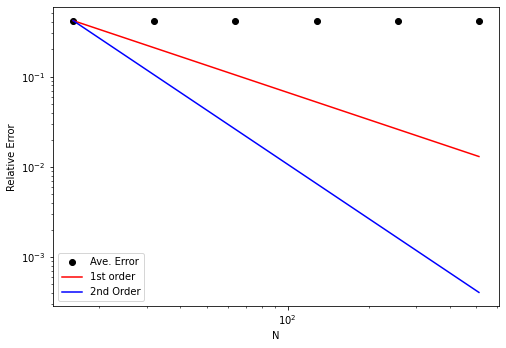

In [17]:
# YOUR CODE HERE
f = lambda t: numpy.sin(t) * numpy.cos(2.0 * t)
N_range = numpy.array([2**n for n in range(4, 10)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = 3.0 * numpy.pi / 2.0

for (i, N) in enumerate(N_range):
    for j in range(6):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
        t.sort()
        y = f(t)
        t_star = golden_search([4.0, 5.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= 6

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
axes.legend()
plt.show()

YOUR ANSWER HERE

## Question 9 - Inverse Quadratic Interpolation

Let us see if we can extend the idea of the secant method to a higher order version.  The idea then is to take 3 values of the function such that $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ and fit an inverse quadratic function through these points (note that this requires that $f(x_i) \neq f(x_j) \forall i \neq j$).  The inverse function can be written as
$$
    g(y) = x_2 + \frac{(y - f(x_1)) (y - f(x_2))(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{(y - f(x_0)) (y - f(x_2))(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$
Inverse quadratic interpolation is one of the core components of many root solvers in libraries such as `numpy`.

Using this new function answer the following questions.

**(a)** [5] Find the x-intercept of the function $g(y)$.

YOUR ANSWER HERE

$$
    g(y) = x_2 + \frac{(y - f(x_1)) (y - f(x_2))(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{(y - f(x_0)) (y - f(x_2))(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$

The $x$ intercept occurs at $g(y=0)$. 

$$
    g(0) = x_2 + \frac{f(x_1) f(x_2)(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{f(x_0) f(x_2) (x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$

**(b)** [5] Write down the resulting iteration so that it has the form
$$
    x_{n+1} = x_n + \phi(x_n, x_{n-1}, x_{n-2})
$$
where $\phi(x_n, x_{n-1}, x_{n-2})$ can also contain evaluations of the original function $f(x)$.

YOUR ANSWER HERE

The resulting iteration becomes
$$
    x_{n+1} = x_n + \phi(x_n, x_{n-1}, x_{n-2})
$$

where 

$$
    \phi(x_n, x_{n-1}, x_{n-2}) = \frac{f(x_{n-1}) f(x_n)(x_{n-2} - x_n)}{(f(x_{n-2}) - f(x_{n-1}))(f(x_{n-2}) - f(x_n))} + \frac{f(x_{n-2}) f(x_n) (x_{n-1} - x_n)}{(f(x_{n-1}) - f(x_{n-2}))(f(x_{n-1}) - f(x_n))}
$$

**(c)** [10] Write a function that implements the inverse quadratic interpolation root finding method which takes in a function $f$ and an initial triplet for an initial guess $(x_0, x_1, x_2)$.  Make sure that it handles the case when the maximum number of steps is taken.

In [18]:
def inv_quad_root(f, x, tolerance=1e-4, max_steps=100):
    """Find a root of f(x) using inverse quadratic interpolation
    
    :Input:
     - *f* (func) Function to find the root of.
     - *x* (list) A triplet of values to be used to start the method.  Note
       that the triplet starts with the x_0 value and ends with the x_2 value
       in terms of the iteration scheme.
     - *tolerance* (float) Tolerance used as a stopping criteria with 
       |f(x_n)| < tolerance.
     - *max_steps* (int) Maximum number of steps allowed.  Raise an exception
       if max_steps are reached.
    :Output:
     - (float) Converged root.
    """
    # YOUR CODE HERE
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    
    if numpy.isclose(x0, x1, x2):
        raise ValueError("initial points are too close")
        
    x_array = [x0, x1, x2]
    for k in range(0, max_steps + 1):
        x3 = x2 + (f(x1) * f(x2) *(x0 - x2))/((f(x0) - f(x1)) * (f(x0) - f(x2))) + (f(x0) * f(x2) * (x1 - x2)) / ((f(x1) - f(x0)) * (f(x1) - f(x2)))
        x_array.append(x3)
        if numpy.abs(f(x3)) < tolerance:
            break 
        x0 = x1
        x1 = x2
        x2 = x3
        
    if k == max_steps:
        warnings.warn("Maximum number of steps exceeded")
    
    x[2] = x3
    return x[2]

In [19]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
f = lambda r, A=A, m=m, P=P, n=n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
root = inv_quad_root(f, [0.06, 0.07, 0.08], tolerance=1e-6, max_steps=10)
print("Found root = %s" % root)
numpy.testing.assert_allclose(root, 0.08985602483470391, atol=1e-5)
print("Success!")

Found root = 0.08985602483470391
Success!
